In [1]:
# Menghubungkan ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/content/drive/My Drive/PKL/Data Harian COVID-19 Maret-Juni.csv', header = None)
print(data.shape)
data.head()

(116, 9)


,0,1,2,3,4,5,6,7,8
0,Tanggal,Kasus,Sembuh,Meninggal,PDP,ODP,Positif,PDPODP,SM
1,2-Mar,2,0,0,NaN,NaN,2,0,0
2,3-Mar,2,0,0,NaN,NaN,2,0,0
3,4-Mar,2,0,0,NaN,NaN,2,0,0
4,5-Mar,2,0,0,NaN,NaN,2,0,0


In [4]:
data = data.drop(index=0, axis=0)

In [5]:
# Mengubah nama kolom
data.columns = ['Tanggal','Kasus','Sembuh','Meninggal','PDP','ODP','Positif', 'PDPODP', 'SM']
print(data.shape)
data.head() 

(115, 9)


,Tanggal,Kasus,Sembuh,Meninggal,PDP,ODP,Positif,PDPODP,SM
1,2-Mar,2,0,0,NaN,NaN,2,0,0
2,3-Mar,2,0,0,NaN,NaN,2,0,0
3,4-Mar,2,0,0,NaN,NaN,2,0,0
4,5-Mar,2,0,0,NaN,NaN,2,0,0
5,6-Mar,4,0,0,NaN,NaN,4,0,0


In [6]:
data = data.fillna(0)

In [7]:
data.dtypes

Tanggal      object
Kasus        object
Sembuh       object
Meninggal    object
PDP          object
ODP          object
Positif      object
PDPODP       object
SM           object
dtype: object

In [8]:
# Mengubah type data
data['Kasus'] = data['Kasus'].astype(int)
data['Sembuh'] = data['Sembuh'].astype(int)
data['Meninggal'] = data['Meninggal'].astype(int)
data['PDP'] = data['PDP'].astype(int)
data['ODP'] = data['ODP'].astype(int)
data['Positif'] = data['Positif'].astype(int)

In [9]:
data['PDPODP'] = data['PDPODP'].astype(int)
data['SM'] = data['SM'].astype(int)

In [10]:
data.dtypes

Tanggal      object
Kasus         int64
Sembuh        int64
Meninggal     int64
PDP           int64
ODP           int64
Positif       int64
PDPODP        int64
SM            int64
dtype: object

In [11]:
data.head()

,Tanggal,Kasus,Sembuh,Meninggal,PDP,ODP,Positif,PDPODP,SM
1,2-Mar,2,0,0,0,0,2,0,0
2,3-Mar,2,0,0,0,0,2,0,0
3,4-Mar,2,0,0,0,0,2,0,0
4,5-Mar,2,0,0,0,0,2,0,0
5,6-Mar,4,0,0,0,0,4,0,0


In [12]:
# Statistik deskriptif dari semua variabel data
data.describe(include='all')

,Tanggal,Kasus,Sembuh,Meninggal,PDP,ODP,Positif,PDPODP,SM
count,115,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
unique,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,25-May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14043.965217,4087.591304,877.600000,11140.965217,79716.817391,14043.965217,90857.782609,4965.191304
std,NaN,14233.313800,5518.443772,779.305266,10367.270143,94991.290184,14233.313800,104370.894481,6260.339686
min,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,NaN,1471.000000,78.000000,129.000000,0.000000,0.000000,1471.000000,0.000000,207.000000
50%,NaN,9511.000000,1254.000000,773.000000,12667.000000,42714.000000,9511.000000,56028.000000,2027.000000
75%,NaN,23508.000000,5967.000000,1445.500000,15994.500000,177613.500000,23508.000000,191926.000000,7412.500000


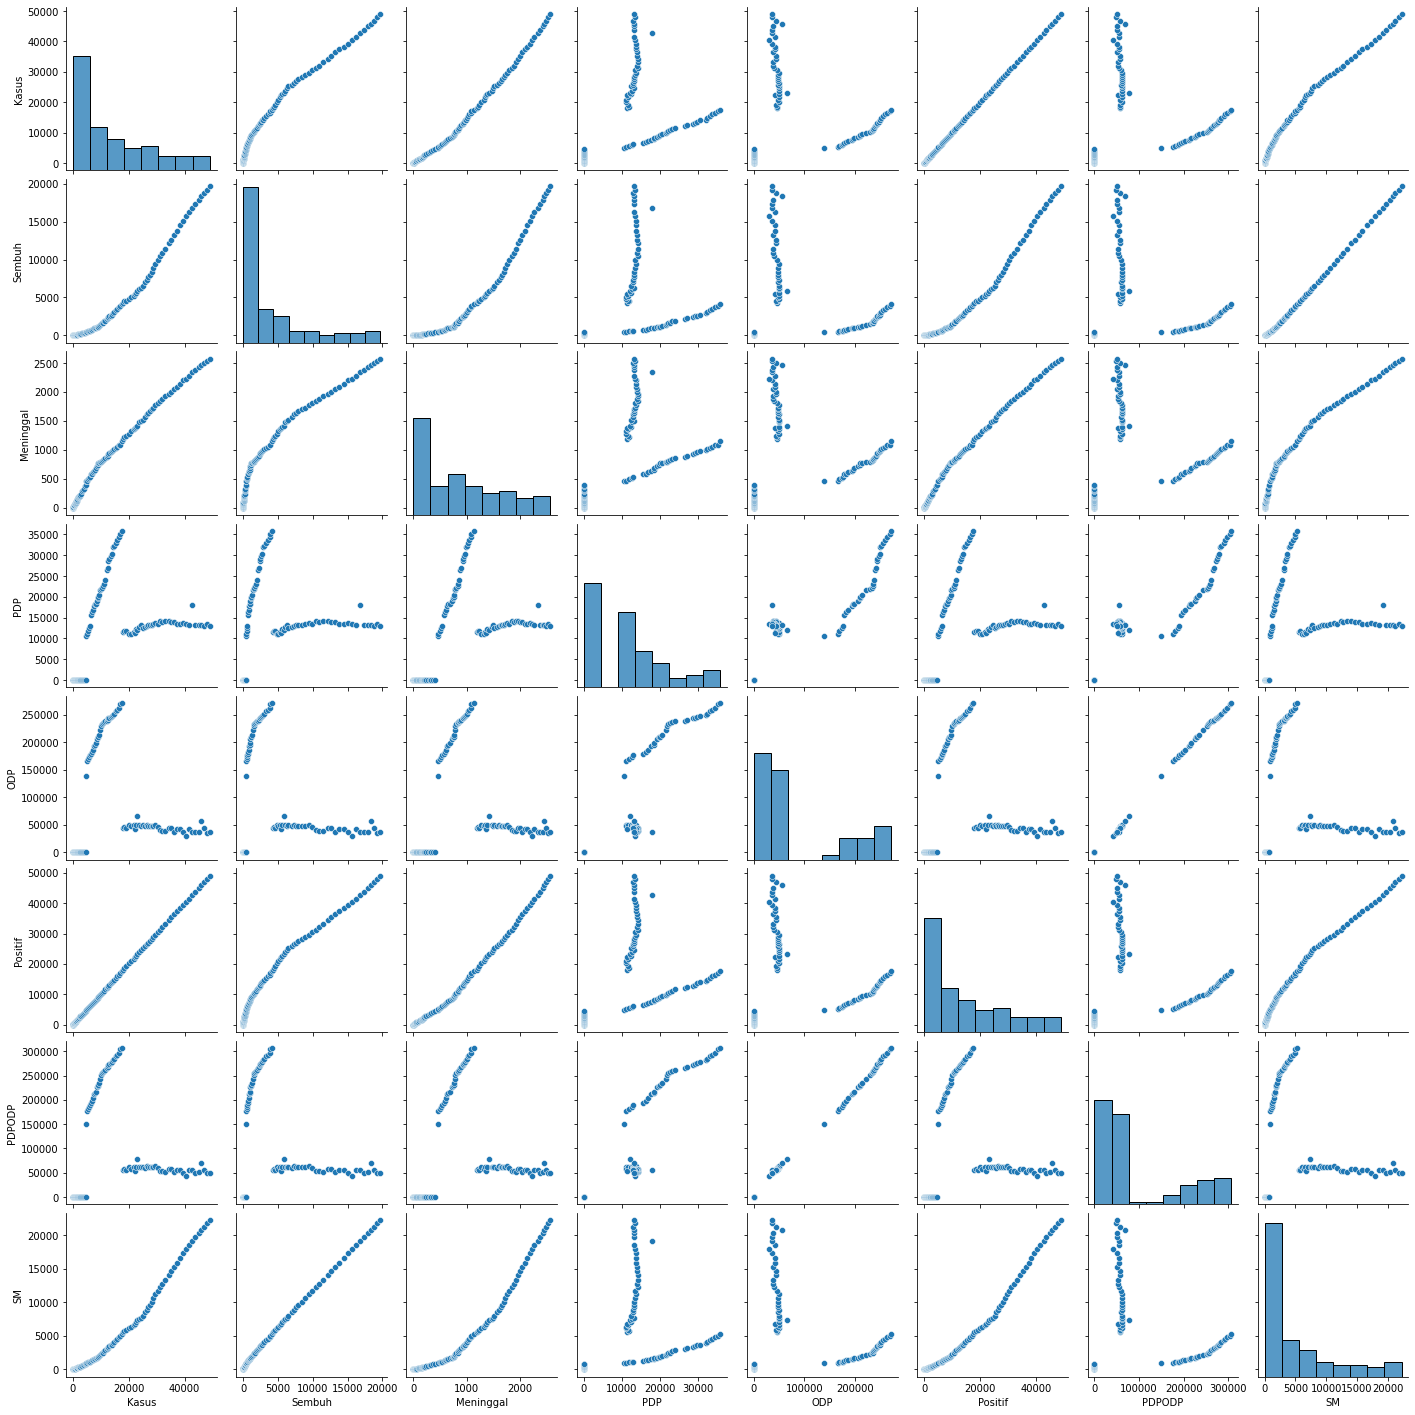

In [13]:
# Cek apakah terdapat outlier
# Histogram dan Scatter Plot
sns_plot = sns.pairplot(data)
print(sns_plot)
sns_plot.savefig("pairplot.png")

In [ ]:
N = len(data)
beta = 2.2  
D = 2.3
gamma = 1.0 / D
delta = 5.2
E0 = data['PDPODP'][1]
I0 = data['Positif'][1]
R0 = data['SM'][1]
# Everyone else, S0, is susceptible to infection initially.
S0 = N - E0 - I0 - R0
# A grid of time points (in days)
t = np.linspace(1, 115, 115)

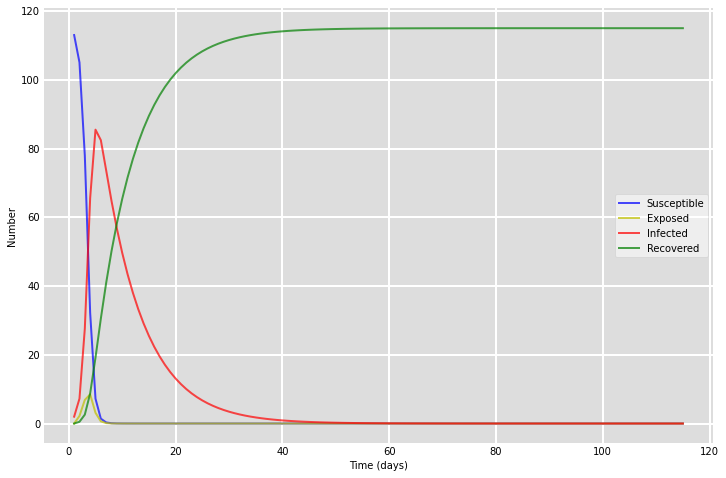

<Figure size 432x288 with 0 Axes>

In [ ]:
def deriv(y, t, N, beta, delta, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, E0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, delta, gamma))
S, E, I, R = ret.T

# Plot the data on three separate curves for S(t), E(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(12,8))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.7, lw=2, label='Susceptible')
ax.plot(t, E, 'y', alpha=0.7, lw=2, label='Exposed')
ax.plot(t, I, 'r', alpha=0.7, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.7, lw=2, label='Recovered')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
plt.savefig("Seirplot.png")